## BackCheck

* 假设我们有一个model，我们喂给他data（通常是$X_1,X_2,X_3,…,X_T$时刻某只股票的涨跌率）他能给出$X_{T+1}$，即未来一天这只股票的涨跌率。
* 我们用其2023-9-1到2023-10-1这30天作为回测期，我们设定我们初始有1000000元。
* 为严谨，买入时支付万三的佣金，卖出支付万三的佣金 + 千分之一的印花税
* 为分担风险，我挑选5个行业，10只股票，每天对10只股票进行预测。
* 设预测的结果中最好的股票收益率为$\xi\%$,当下的持仓率为$m\%$,如果$m>75时$,除非$\xi>2$,不然不加仓；$25<m<75$时,$\xi>1$就加仓，$m<25$时，$\xi>0.5$就加仓

In [7]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt  

data = pd.read_csv('pingan.csv') 
date_list = data['date'].tolist()  
pct_chg_list = data['pctChg'].tolist()  
close_list = data['close'].tolist() 

In [8]:
def strategy_5d_mean(i,pct_chg_list):
    avg_value = (pct_chg_list[i-5]+pct_chg_list[i-4]+pct_chg_list[i-3]+pct_chg_list[i-2]+pct_chg_list[i-1])/5
    if avg_value>0:
        return True

In [9]:
"""
双均线策略
"""
    
# 计算第i天的m日均线值
def caculate_avg(i,m):
    return sum(close_list[i-k] for k in range(1, m+1)) / m

def strategy_two_avg(i):
    short_avg = []
    long_avg = []
    for t in range(i-5,i+1):   
        short_avg.append(caculate_avg(t,5)) # 从i-5到t天的五日均线
        long_avg.append(caculate_avg(t,15)) # 从i-5到t天的二十日均线
    if short_avg[-1] > long_avg[-1] and short_avg[-2] <= long_avg[-2]:
        return 1 # 金叉买入
    elif short_avg[-1] < long_avg[-1] and short_avg[-2] >= long_avg[-2]:
        return -1 # 死叉卖出
    else:
        return 0


In [10]:
Init_Money = 100000 # 初始资金
stock_cnt = 0 # 初始持股数目

backcheck_day_list = []
backcheck_stock_cnt = []
backcheck_current_value = []
for i in range(100,len(date_list)):
    avg_value = (pct_chg_list[i-5]+pct_chg_list[i-4]+pct_chg_list[i-3]+pct_chg_list[i-2]+pct_chg_list[i-1])/5
    # 若5日平均涨幅>0，买入
    trade_today = 0 # 今日买入量
    if (strategy_two_avg(i)==1 and Init_Money>0):
        # 买入500股，并支付万三佣金
        Init_Money = Init_Money - 500*close_list[i]-3/10000*500*close_list[i]
        stock_cnt += 500
        trade_today = 500 
    
    # 如果亏损超过10%，及时卖掉止损 
    # 如果今天刚买入了500股，只能卖不是今天买入的（T+1交易）
    if  strategy_two_avg==-1 and (stock_cnt-trade_today)>=500:
        Init_Money = Init_Money + 500*close_list[i]-3/10000*500*close_list[i]
        stock_cnt -= 500
    print((Init_Money+close_list[i]*stock_cnt)/100000)
    backcheck_day_list.append(date_list[i])
    backcheck_stock_cnt.append(stock_cnt)
    backcheck_current_value.append(Init_Money+close_list[i]*stock_cnt)
    print(date_list[i],"持股{}股".format(stock_cnt),"今日市值：",Init_Money+close_list[i]*stock_cnt)

0.9998872899999999
2020-06-04 持股500股 今日市值： 99988.72899999999
1.00068729
2020-06-05 持股500股 今日市值： 100068.72899999999
1.00778729
2020-06-08 持股500股 今日市值： 100778.72899999999
1.00668729
2020-06-09 持股500股 今日市值： 100668.72899999999
1.00208729
2020-06-10 持股500股 今日市值： 100208.72899999999
0.9952872899999999
2020-06-11 持股500股 今日市值： 99528.72899999999
0.99493729
2020-06-12 持股500股 今日市值： 99493.72899999999
0.98688729
2020-06-15 持股500股 今日市值： 98688.72899999999
0.9914872899999999
2020-06-16 持股500股 今日市值： 99148.72899999999
0.9892372899999999
2020-06-17 持股500股 今日市值： 98923.72899999999
0.9911872899999999
2020-06-18 持股500股 今日市值： 99118.72899999999
0.9912872899999999
2020-06-19 持股500股 今日市值： 99128.72899999999
0.98803729
2020-06-22 持股500股 今日市值： 98803.72899999999
0.98398729
2020-06-23 持股500股 今日市值： 98398.72899999999
0.9854872899999999
2020-06-24 持股500股 今日市值： 98548.72899999999
0.9792372899999999
2020-06-29 持股500股 今日市值： 97923.72899999999
0.9811872899999999
2020-06-30 持股500股 今日市值： 98118.72899999999
0.9916872899999999
2020

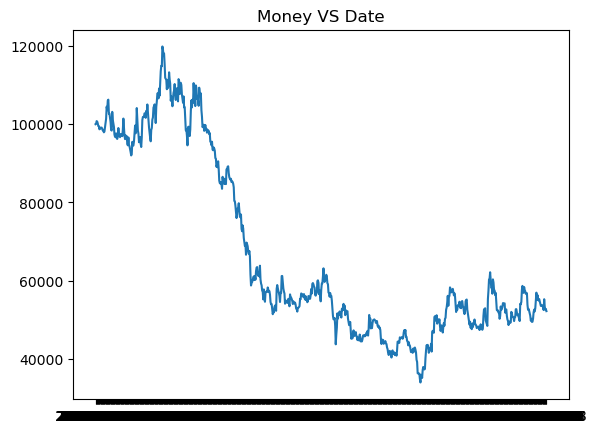

In [11]:
plt.plot(backcheck_day_list,backcheck_current_value)

plt.title("Money VS Date")
plt.show()

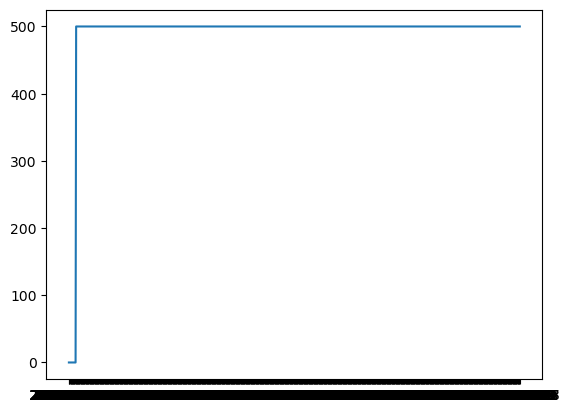

In [6]:
plt.plot(backcheck_day_list,backcheck_stock_cnt)
plt.show()